Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 12 numeric/categorical predictive. Median Value (attribute 13) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.



In [1]:
# Importando os módulos necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

##### Carregando o dataset

In [2]:
df  = pd.read_csv('boston_house_prices.csv')
df = df.drop('B', axis=1)
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


##### Mostrando gráfico de correlação entre número de quartos por casa e preço da casa

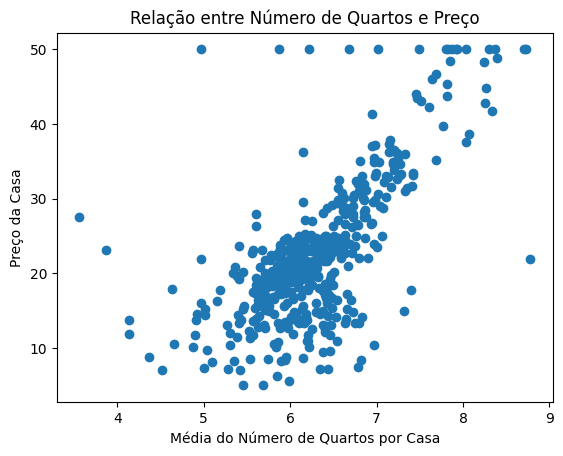

In [3]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel("Média do Número de Quartos por Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

<style>
    .red {color: red;}
    .blue {color: blue;}
</style>
### Treinando nosso modelo de regressão

##### PRICE = <span class='red'>a</span> * CRIM + <span class='red'>b</span> * ZN  + <span class='red'>c</span> * INDUS + <span class='red'>d</span> * CHAS + <span class='red'>e</span> * NOX + <span class='red'>f</span> * RM + <span class='red'>g</span> * AGE + <span class='red'>h</span> * DIS + <span class='red'>i</span> * RAD + <span class='red'>j</span> * TAX + <span class='red'>k</span> * PTRATIO + <span class='red'>j</span> * LSTAT  + <span class='red'>k</span>

In [17]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

# Criando o objeto de regressão linear
regr = LinearRegression()

# Treinando o modelo
X = df.drop('PRICE', axis = 1)
Y = df.PRICE
regr.fit(X, Y)

print("Número de Coeficientes Ajustados: ", len(regr.coef_))
regr.coef_

Número de Coeficientes Ajustados:  12


array([-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,  2.83999338e+00,
       -1.87580220e+01,  3.65811904e+00,  3.61071055e-03, -1.49075365e+00,
        2.89404521e-01, -1.26819813e-02, -9.37532900e-01, -5.52019101e-01])

#### Analisando parâmetros e predições do modelo treinado

In [18]:
# Coeficientes
regr.predict(X)

array([30.03373805, 25.05683368, 30.60818602, 28.67717948, 27.928791  ,
       25.39316857, 22.80496155, 19.19898495, 11.07897982, 18.71966912,
       18.62438629, 21.39246353, 20.60745482, 19.54258612, 19.42338826,
       19.29854778, 20.56134548, 16.87747529, 17.09180043, 18.43760689,
       12.52394623, 17.63469278, 15.59842603, 13.63779912, 15.57390124,
       14.14580816, 15.56515976, 15.35858528, 19.5109376 , 20.88646225,
       11.52648291, 18.19763703,  9.85998433, 14.49395604, 14.83212976,
       23.83455965, 22.48819096, 23.07938508, 22.83020538, 31.43055097,
       34.26922099, 27.99845331, 25.27611814, 24.52743894, 22.96863585,
       22.08532214, 20.28694959, 17.918101  ,  8.74324717, 17.11021002,
       21.15393966, 23.99706202, 27.58402585, 23.97009389, 15.26850351,
       31.07547354, 24.91295459, 33.15306888, 21.73625055, 21.02325709,
       17.79903953, 18.61209277, 23.96892556, 22.3430303 , 23.35021797,
       30.37899322, 25.51127036, 21.09138792, 17.34408592, 20.76

# Erro Absoluto Médio:
##### MAE =  ∑(|Preço Original - Preço Predito|)

In [19]:
# Vamos calcular o MAE (Mean Squared Error)
mse = np.mean(np.abs(df.PRICE - regr.predict(X)))

print(f"Erro médio absoluto: {mse:.2f}")

Erro médio absoluto: 3.36


##### Analisando a correlação entre os preços preditos e os preços reais

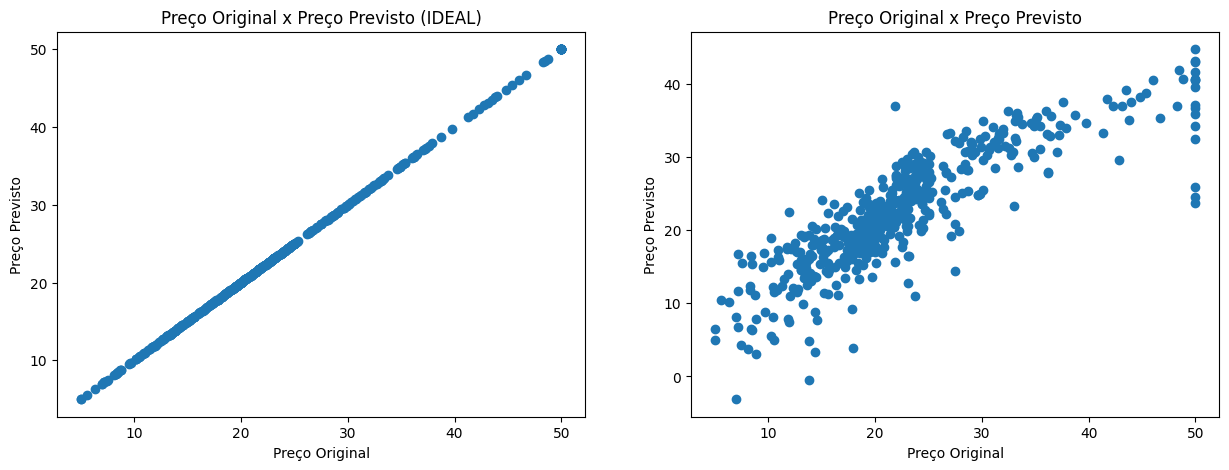

In [20]:
# Comparando preços originais x preços previstos
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(Y,Y)
ax[0].set_xlabel("Preço Original")
ax[0].set_ylabel("Preço Previsto")
ax[0].set_title("Preço Original x Preço Previsto (IDEAL)")

ax[1].scatter(Y, regr.predict(X))
ax[1].set_xlabel("Preço Original")
ax[1].set_ylabel("Preço Previsto")
ax[1].set_title("Preço Original x Preço Previsto")



plt.show()

### E se treinarmos com apenas uma feature? Vamos testar para número de quartos

In [22]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['RM']], df.PRICE)
mse = np.mean(np.abs((df.PRICE - regr.predict(X[['RM']])) ))
print(f"Erro médio absoluto: {mse:.2f}")

Erro médio absoluto: 4.45


### Vamos analisar as correlações de cada variável com o preço das casas

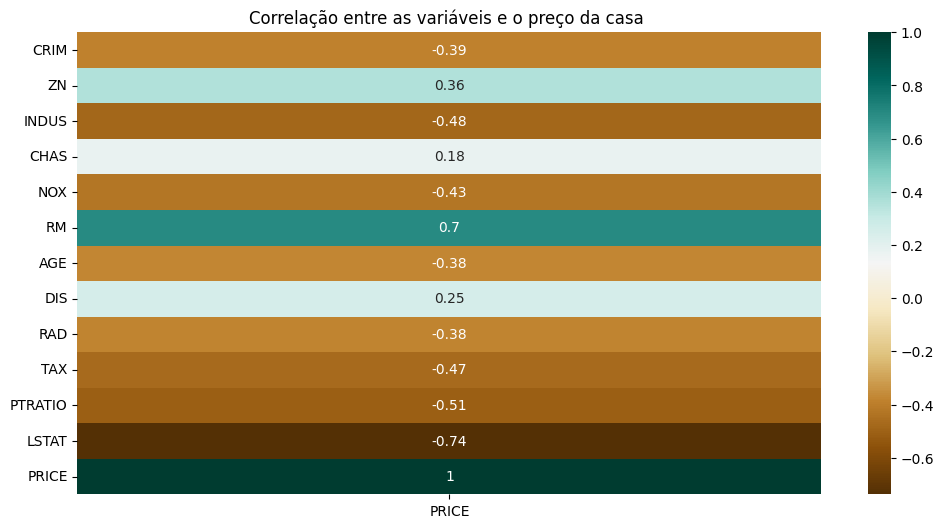

In [26]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr()['PRICE'].to_frame(), annot=True, cmap = 'BrBG')
plt.title("Correlação entre as variáveis e o preço da casa ")
plt.show()

#### Vamos tentar usar apenas a variável com maior correlação para ver o que acontece

In [23]:
# Aplicando regressão linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['LSTAT']], df.PRICE)
mse = np.mean(np.abs((df.PRICE - regr.predict(X[['LSTAT']])) ))
print(f"Erro médio absoluto: {mse:.2f}")

Erro médio absoluto: 4.51


### Vamos tentar retirar as duas variáveis que quase não tem correlação com o preço das casas

In [24]:
# Criando o objeto de regressão linear
regr = LinearRegression()

# Treinando o modelo
X = df.drop(['PRICE', 'CHAS', 'DIS'], axis = 1)
Y = df.PRICE
regr.fit(X, Y)
# Coeficientes
print("Número de Coeficientes: ", len(regr.coef_))

# Vamos calcular o MAE (Mean Squared Error)
mse = np.mean(np.abs(df.PRICE - regr.predict(X)))

print(f"Erro médio absoluto: {mse:.2f}")


Número de Coeficientes:  10
Erro médio absoluto: 3.55


<h1 style="color: red;"> Desafio! </h1>
<h3> Existe um erro na estratégia de validação do modelo! Qual??

### Nós obtivemos nossas métricas com os mesmos dados utilizados no treinamento, isso torna nossas métricas de validação enviesadas e fracas

### Para resolver isso, iremos separar 1/4 do nosso dataset para validação e iremos treiná-lo com apenas 3/4 dos dados

In [27]:
from sklearn.model_selection import train_test_split

# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.25, random_state = 5)


print(f"Quantidade de ítems de treinamento: {X_treino.shape[0]}")
print(f"Quantidade de ítems de teste: {X_teste.shape[0]}")



Quantidade de ítems de treinamento: 379
Quantidade de ítems de teste: 127


In [28]:
# Construindo um modelo de regressão
regr = LinearRegression()

# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression()

In [29]:
# Vamos calcular o MAE (Mean Squared Error)
mse = np.mean(np.abs(Y_teste - regr.predict(X_teste)))

print(f"Erro médio absoluto: {mse:.2f}")

Erro médio absoluto: 3.58


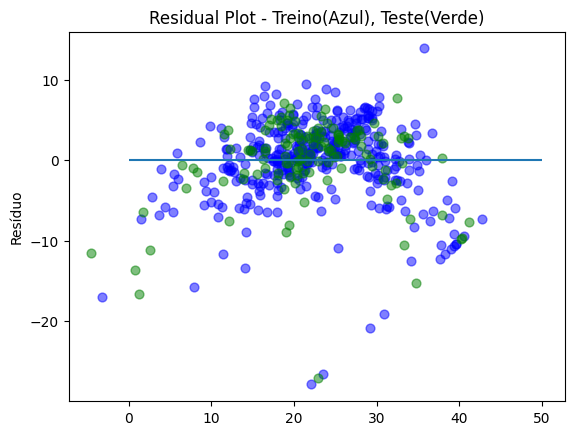

In [30]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()